### Detectando Phishing em Redes de Computadores -  Aprendizado de Máquina

Dicionário de Features

0. **having\_IP\_Address** — URL usa **endereço IP** em vez de domínio (ex.: `http://123.45.67.89/...`).
1. **URL\_Length** — **Comprimento total** da URL.
2. **Shortining\_Service** — Uso de **encurtadores** (ex.: `bit.ly`, `tinyurl`) para mascarar o destino.
3. **having\_At\_Symbol** — Presença do símbolo **`@`** na URL.
4. **double\_slash\_redirecting** — **`//`** em posição incomum indicando possível **redirecionamento**.
5. **Prefix\_Suffix** — **Hífen (`-`)** no nome de domínio.
6. **having\_Sub\_Domain** — **Quantidade de subdomínios** (muitos “pontos”).
7. **SSLfinal\_State** — Sinais de **HTTPS/certificado** (não basta ter cadeado).
8. **Domain\_registeration\_length** — **Tempo de registro** do domínio (WHOIS).
9. **Favicon** — **Favicon** carregado de **outro domínio**.
10. **port** — Uso de **portas não padrão** (além de 80/443).
11. **HTTPS\_token** — Palavra **“https”** dentro do **domínio** para simular segurança.
12. **Request\_URL** — Objetos (imagens/scripts) carregados de **outro domínio**.
13. **URL\_of\_Anchor** — Muitos links `<a>` que apontam **para fora** ou para `#`/`javascript:void(0)`.
14. **Links\_in\_tags** — Links externos em **`<meta>`/`<script>`/`<link>`**.
15. **SFH** — **Destino do formulário** vazio/`about:blank` ou domínio diferente do da página.
16. **Submitting\_to\_email** — Formulário **envia dados por e-mail** (`mailto:`/`mail()`).
17. **Abnormal\_URL** — **Inconsistências** entre URL e dados de **WHOIS/identidade**.
18. **Redirect** — **Número de redirecionamentos** até a página final.
19. **on\_mouseover** — JS altera a **barra de status** ao passar o mouse (esconde URL real).
20. **RightClick** — **Desabilita o clique direito** (dificulta inspeção).
21. **popUpWidnow** — **Pop-ups** pedindo **informações sensíveis**.
22. **Iframe** — Uso de **`<iframe>`** (muitas vezes oculto) para embutir outra página.
23. **age\_of\_domain** — **Idade do domínio** (WHOIS).
24. **DNSRecord** — Existência/consistência de **registros DNS/WHOIS**.
25. **web\_traffic** — **Popularidade/tráfego** (ex.: Alexa).
26. **Page\_Rank** — **Autoridade**/ranqueamento da página.
27. **Google\_Index** — **Indexação** da página no Google.
28. **Links\_pointing\_to\_page** — **Backlinks** que apontam para a página.
29. **Statistical\_report** — Presença em **listas/feeds** de domínios/IPs maliciosos.
30. **Result** — **Rótulo** da amostra (legítimo/suspeito/phishing).


In [1]:
# Import das biliotecas
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support)

### Leitura do arquivo

In [2]:
df_renomeado = pd.read_csv('dataset_modelo_phishing.csv')

In [3]:
df_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11054 non-null  int64
 1   URL_Length                   11054 non-null  int64
 2   Shortining_Service           11054 non-null  int64
 3   having_At_Symbol             11054 non-null  int64
 4   double_slash_redirecting     11054 non-null  int64
 5   Prefix_Suffix                11054 non-null  int64
 6   having_Sub_Domain            11054 non-null  int64
 7   SSLfinal_State               11054 non-null  int64
 8   Domain_registeration_length  11054 non-null  int64
 9   Favicon                      11054 non-null  int64
 10  port                         11054 non-null  int64
 11  HTTPS_token                  11054 non-null  int64
 12  Request_URL                  11054 non-null  int64
 13  URL_of_Anchor                11054 non-null  i

#### Avaliação das correlação das features

#### Matriz de Correlação-Spearman

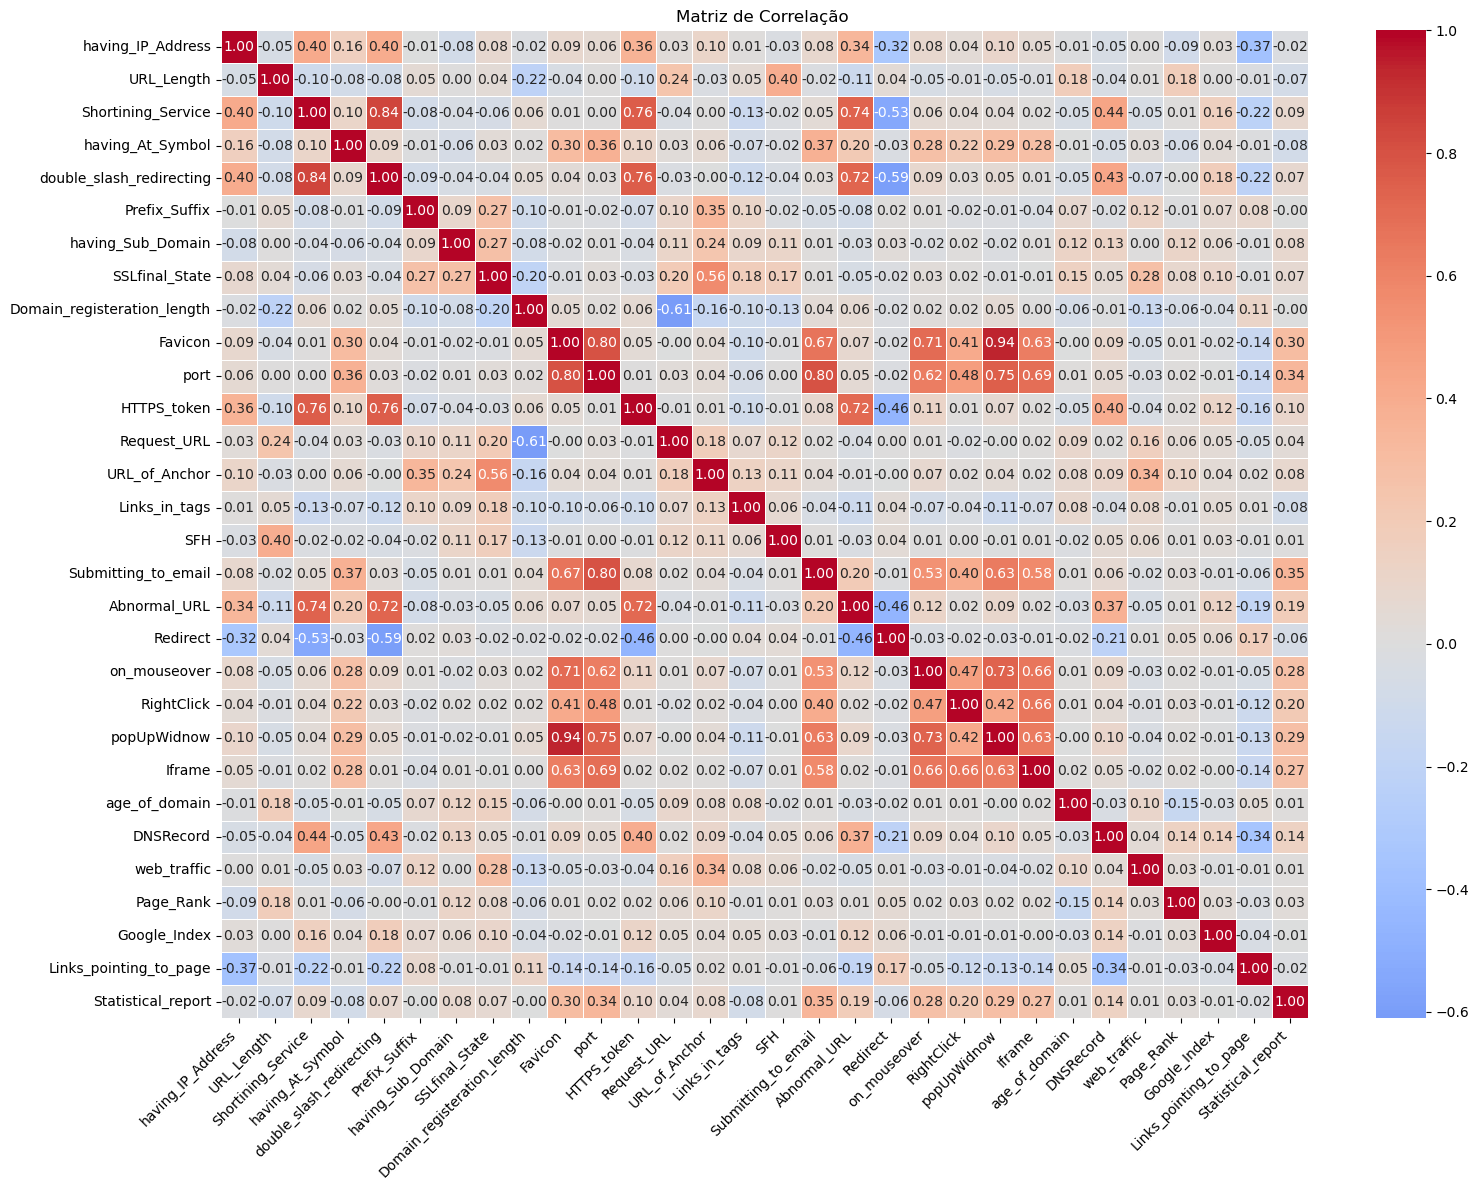

Colunas com alta correlação (>0.9):
['popUpWidnow']


In [4]:
# Seleciona as colunas
features = df_renomeado.drop(columns=['Result'], errors='ignore')

# Correlação de Spearman 
corr = features.corr(method='spearman')

# Heatmap 
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, center=0)
plt.title("Matriz de Correlação ")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Calcula a correlação
# Seleciona apenas metade superior da matriz (triângulo superior)
upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

# Features com correlação maior que 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Colunas com alta correlação (>0.9):")
print(to_drop)


##### **Conclusões:**

Aplicando o filtro de correlação (ρ > 0,9), verificou-se alta correlação entre as colunas 'popUpWidnow' e 'Flavicon'; por isso, 'popUpWidnow' foi removida.

#### Seleção de features

In [5]:
# Com base no resultado da correlação a coluna indicada foi removida
df_renomeado =df_renomeado.drop('popUpWidnow',axis=1)

#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - Random Forest


Relatório Detalhado:
Acurácia :  0.9506
Precisão :  0.9497
Recall   :  0.9381
F1-Score :  0.9438
AUC-ROC  :  0.9923

              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.96      1848
    Phishing       0.95      0.94      0.94      1469

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317


Taxa de phishing detectada: 43.74%
Taxa real de phishing     : 44.29%


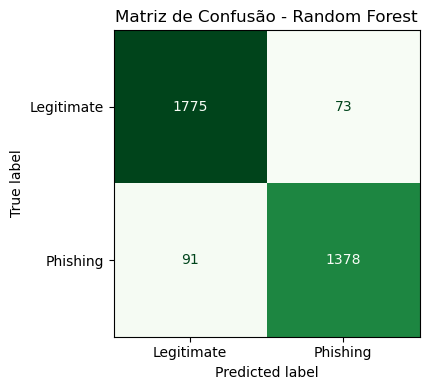

In [6]:
#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - Random Forest

# Variável target
y_raw = df_renomeado['Result']
y_num = pd.to_numeric(y_raw, errors='coerce')
# Conveter para classição binária 0/1 
y = (y_num == -1).astype(int)  # phishing=1, legítimo=0

# Features (X) = todas as colunas exceto 'Result'
X = df_renomeado.drop(columns=['Result']).copy()
feature_cols = X.columns.tolist()

#  Modelo: Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=20,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline(steps=[    
    ("model", rf)
])


# Split estratificado (treino/teste)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, stratify=y, random_state=42)

# Treinar e avaliar
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc = (y_pred == y_test).mean()
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("\nRelatório Detalhado:")
print(f"Acurácia : {acc: .4f}")
print(f"Precisão : {prec: .4f}")
print(f"Recall   : {rec: .4f}")
print(f"F1-Score : {f1: .4f}")
print(f"AUC-ROC  : {auc: .4f}\n")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"], zero_division=0))
print(f"\nTaxa de phishing detectada: {y_pred.mean()*100:.2f}%")
print(f"Taxa real de phishing     : {y_test.mean()*100:.2f}%")

#  Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legitimate", "Phishing"])
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, values_format='d', colorbar=False, cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()



##### **Conclusões Random Forest:**

- O modelo Random Forest demonstrou um desempenho muito bom na detecção de sites de phishing.

- Ele recupera bem os ataques de phishing, com um Recall de 94%, e resultou em apenas 91 Falsos Negativos (casos de phishing não detectados).

- Apresenta uma precisão de detecção de 95% para a classe de phishing, o que significa poucos falsos alarmes.

- Os valores de F1-Score ≈ 0.94 e AUC-ROC ≈ 0.99 indicam que o modelo separa bem as classes e quase não perde ataques.

- A taxa de Falsos Positivos (FPR) é de aproximadamente 4%, o que é um valor baixo e pode ser considerado aceitável na maioria dos casos.

- A taxa de phishing detectada (43,74%) ficou muito próxima da taxa real (44,29%), mostrando que o modelo representa bem a distribuição dos dados.

#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - Regressão Logística


Relatório Detalhado:
Acurácia :  0.9292
Precisão :  0.9220
Recall   :  0.9176
F1-Score :  0.9198
AUC-ROC  :  0.9806

              precision    recall  f1-score   support

  Legitimate       0.93      0.94      0.94      1848
    Phishing       0.92      0.92      0.92      1469

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317


Taxa de phishing  detectada: 44.08%
Taxa real de phishing : 44.29%


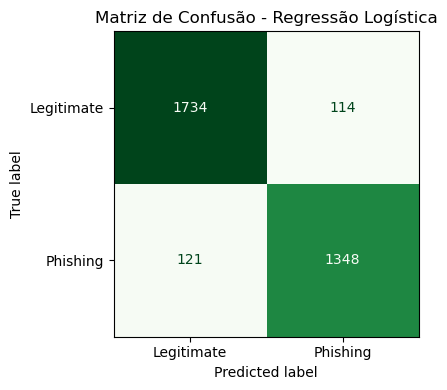

In [7]:
#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - Regressão Logística

# Target
y_raw = df_renomeado['Result']
y_num = pd.to_numeric(y_raw, errors='coerce')
# Conveter para classição binária 0/1 
y = (y_num == -1).astype(int)  # phishing=1, legítimo=0

# Features (X)
X = df_renomeado.drop(columns=['Result']).copy()

# Modelo: Regressão Logística
lr = LogisticRegression(
    penalty="l2",
    solver="saga",
    C=1.0,
    max_iter=2000,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

pipe = Pipeline(steps=[    
    ("scaler", StandardScaler(with_mean=False)),  
    ("model", lr)
])

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)


# Treino e avaliação 
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc = (y_pred == y_test).mean()
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("\nRelatório Detalhado:")
print(f"Acurácia : {acc: .4f}")
print(f"Precisão : {prec: .4f}")
print(f"Recall   : {rec: .4f}")
print(f"F1-Score : {f1: .4f}")
print(f"AUC-ROC  : {auc: .4f}\n")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"], zero_division=0))
print(f"\nTaxa de phishing  detectada: {y_pred.mean()*100:.2f}%")
print(f"Taxa real de phishing : {y_test.mean()*100:.2f}%")

#  Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legitimate", "Phishing"])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, values_format='d', colorbar=False,cmap='Greens')
plt.title("Matriz de Confusão - Regressão Logística")
plt.tight_layout()
plt.show()



##### **Conclusões Regressão Logística:**


- O modelo de Regressão Logística demonstra um desempenho bom também, embora ligeiramente inferior ao do modelo Random Forest anterior.

- Ele recupera bem os ataques de phishing, com um Recall de 92%, e resultou em 121 Falsos Negativos.

- Apresenta uma precisão de 92% e um recall de 92% para a classe de phishing.

- Os valores de F1-Score ≈ 0.92 e AUC-ROC ≈ 0.98 indicam que o modelo é eficaz em separar as classes.

- A taxa de Falsos Positivos (FPR) é de aproximadamente 6%, um pouco maior do que a do modelo anterior, representando 114 falsos alarmes.

- A taxa de phishing detectada (44.08%) ficou muito próxima da taxa real (44.29%), mostrando que o modelo representa bem a distribuição dos dados.

#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - SVM (Support Vector Classifier)


Relatório Detalhado:
Acurácia :  0.9445
Precisão :  0.9484
Recall   :  0.9251
F1-Score :  0.9366
AUC-ROC  :  0.9872

              precision    recall  f1-score   support

  Legitimate       0.94      0.96      0.95      1848
    Phishing       0.95      0.93      0.94      1469

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



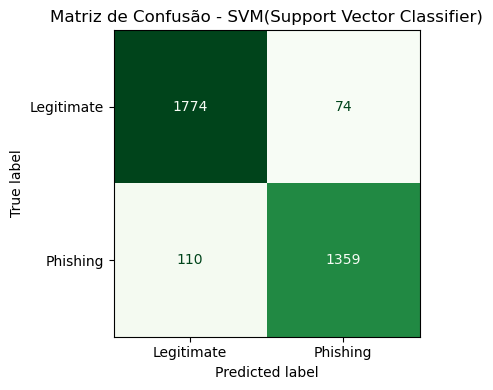

In [8]:
#### Aplicação do Modelo de Aprendizado de Máquina Supervisionado - SVM (Support Vector Classifier)

# Alvo (Result: -1=phishing, 1=legítimo) -> (1/0)
y_raw = df_renomeado['Result']
y_num = pd.to_numeric(y_raw, errors='coerce')
# Conveter para classição binária 0/1 
y = (y_num == -1).astype(int)  # phishing=1, legítimo=0


#  Features (X)
X = df_renomeado.drop(columns=['Result']).copy()


cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  
])


#  Modelo: SVM RBF
svm = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    class_weight="balanced",
    probability=True
)

pipe = Pipeline(steps=[    
    ("scaler", StandardScaler(with_mean=False)),  
    ("model", svm)
])

#  Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

#  Treino e avaliação
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc = (y_pred == y_test).mean()
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("\nRelatório Detalhado:")
print(f"Acurácia : {acc: .4f}")
print(f"Precisão : {prec: .4f}")
print(f"Recall   : {rec: .4f}")
print(f"F1-Score : {f1: .4f}")
print(f"AUC-ROC  : {auc: .4f}\n")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"], zero_division=0))


#  Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legitimate", "Phishing"])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, values_format='d', colorbar=False,cmap='Greens')
plt.title("Matriz de Confusão - SVM(Support Vector Classifier)")
plt.tight_layout()
plt.show()



##### **Conclusões SVM:**

- O modelo de SVM (Support Vector Machine) demonstra um desempenho muito bom também, com métricas muito próximas às do modelo Random Forest e melhores que as da Regressão Logística.

- Ele recupera bem os ataques de phishing, com um Recall de 93%, e resultou em 110 Falsos Negativos.

- Apresenta uma precisão de 95% e um recall de 93% para a classe de phishing.

- Os valores de F1-Score ≈ 0.94 e AUC-ROC ≈ 0.99 sugerem que o modelo é altamente eficaz em separar as classes e quase não perde ataques.

- A taxa de Falsos Positivos (FPR) é de aproximadamente 4%, um valor baixo e que demonstra a baixa ocorrência de falsos alarmes.

#### **Considerações Finais**:

Os três modelos **Random Forest, SVM** e **Regressão Logística**, apresentaram um desempenho excelente, com métricas acima de 92% em quase todos os critérios. Isso indica que as features selecionadas são adequadas e permitem que os modelos aprendam a diferença entre sites legítimos e de phishing de forma muito eficaz.

- O **Random Forest** foi o modelo com melhor desempenho geral. Ele superou os outros em todas as métricas-chave, com a maior acurácia (95%), o maior recall (94%) e o menor número de falsos negativos (91). Uma alta pontuação de AUC-ROC (99%) sugere que ele é o mais capaz de distinguir corretamente entre as duas classes.

- O **SVM** vem logo após o Random Forest, suas métricas de acurácia e precisão foram muito próximas às do Random Forest com F1-score 94% e AUC 99%. Contudo, apresentou mais Falsos Positivos (74) e Falsos Negativos (110), tornando-o o segundo melhor modelo.

- A **Regressão Logística** apresentou o resultado mais baixo entre os três, com F1-Score 92% e AUC 98%. Foi o que mais apresentou Falsos Positivos (114) e Falsos Negativos (121). Dessa forma, sendo o menos adequado para detecção de phishig.

Para aplicações reais, é essencial tratar o desbalanceamento das classes e priorizar o recall na detecção de phishing para reduzir falsos negativos, sem perder de vista o impacto na precisão.